<a href="https://colab.research.google.com/github/amitmee/amitmee.github.io/blob/master/TwitterSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
consumerKey = 'ZoqGQCvqeczEgpQ4T2ZQxrw5t'
consumerSecret = 'ptyMaXz7frWurJQ6DHofZM3nhCnnGl2bZeMuoMtcOdPsZgJvAP'
accessToken = '1289843067076280323-hkWqRYxZMqHObfqCtphr65rNFMCB8w'
accessTokenSecret = 'BT85piwwWyDTrEH59ZGMO8CTCl0lZ7jKjrzcv2FryVSKu'

In [6]:
authenticate = tweepy.OAuthHandler(consumerKey,consumerSecret)
authenticate.set_access_token(accessToken, accessTokenSecret)

In [7]:
api = tweepy.API(authenticate,wait_on_rate_limit = True)

In [8]:
posts = api.user_timeline(screen_name = "BillGates",count=100, lang = "en" , tweet_mode="extended")
print("5 tweets \n")
i =1
for tweet in posts[0:5]:
  print(str(i) + ')' + tweet.full_text + '\n')
  i = i + 1

5 tweets 

1)In his final words, John Lewis challenges all of us to continue to stand up for what we truly believe. “Together, you can redeem the soul of our nation.” 

https://t.co/5qj0T86Fr1

2)The impacts of COVID-19 are driving worrying increases in malnutrition and health outcomes. However, there are clear actions that can be taken in both the near- and long-term. https://t.co/kBaC9sCwB5

3)RT @trevormundel: The @WorldBank’s support of @CEPIvaccines and @gavi is instrumental to the research and development of the #COVID19 vacci…

4)In these challenging times, we can’t lose sight of the importance of combatting climate change. I’m excited to hear about how companies like @Microsoft are finding a way to play a role. https://t.co/yHioRS92m2

5)Science and innovation will help us beat COVID-19. Dr. Fauci explains why. https://t.co/ZL597r4pNZ



In [9]:
df =  pd.DataFrame( [tweet.full_text for tweet in posts] , columns=['Tweets'])
df.head()

,Tweets
0,"In his final words, John Lewis challenges all ..."
1,The impacts of COVID-19 are driving worrying i...
2,RT @trevormundel: The @WorldBank’s support of ...
3,"In these challenging times, we can’t lose sigh..."
4,Science and innovation will help us beat COVID...


In [10]:
def cleanTxt(text): 
  text = re.sub(r'@[A-Za-z0-9]+','',text)
  text = re.sub(r'#','',text)
  text = re.sub(r':','',text)
  text = re.sub(r'RT[\s]+','',text)
  text = re.sub(r'https?:\/\/\S+','',text)
  return text
df['Tweets'] = df['Tweets'].apply(cleanTxt)
df

,Tweets
0,"In his final words, John Lewis challenges all ..."
1,The impacts of COVID-19 are driving worrying i...
2,The ’s support of and is instrumental to the...
3,"In these challenging times, we can’t lose sigh..."
4,Science and innovation will help us beat COVID...
...,...
95,The world must work together to slow the coron...
96,Roger’s foundation partners with local NGOs...
97,I’m excited to team up with again for the Mat...
98,As we conclude our foundation’s second decade ...


In [11]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,"In his final words, John Lewis challenges all ...",1.000000,0.000000
1,The impacts of COVID-19 are driving worrying i...,0.391667,0.100000
2,The ’s support of and is instrumental to the...,0.000000,0.000000
3,"In these challenging times, we can’t lose sigh...",0.875000,0.437500
4,Science and innovation will help us beat COVID...,0.000000,0.000000
...,...,...,...
95,The world must work together to slow the coron...,0.466667,-0.100000
96,Roger’s foundation partners with local NGOs...,0.279167,0.225000
97,I’m excited to team up with again for the Mat...,0.750000,0.375000
98,As we conclude our foundation’s second decade ...,0.166667,0.166667


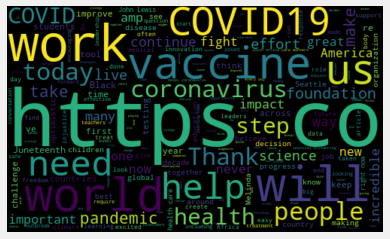

In [12]:
allWords = ' '.join([twts for twts in df['Tweets']] )
wordCloud = WordCloud(width = 500,height = 300,random_state= 21, max_font_size =119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [13]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else :
    return 'Positive'
df['Analysis']= df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,"In his final words, John Lewis challenges all ...",1.000000,0.000000,Neutral
1,The impacts of COVID-19 are driving worrying i...,0.391667,0.100000,Positive
2,The ’s support of and is instrumental to the...,0.000000,0.000000,Neutral
3,"In these challenging times, we can’t lose sigh...",0.875000,0.437500,Positive
4,Science and innovation will help us beat COVID...,0.000000,0.000000,Neutral
...,...,...,...,...
95,The world must work together to slow the coron...,0.466667,-0.100000,Negative
96,Roger’s foundation partners with local NGOs...,0.279167,0.225000,Positive
97,I’m excited to team up with again for the Mat...,0.750000,0.375000,Positive
98,As we conclude our foundation’s second decade ...,0.166667,0.166667,Positive


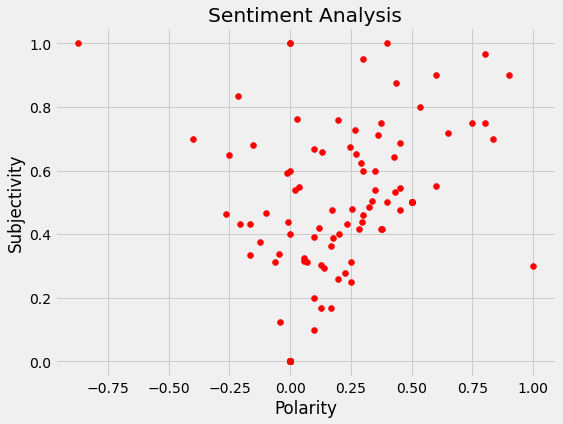

In [14]:
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Red' )
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [15]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets
round( (ptweets.shape[0]/df.shape[0])*100, 1)

67.0

In [16]:
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets
round( (ntweets.shape[0]/df.shape[0])*100, 1)

16.0

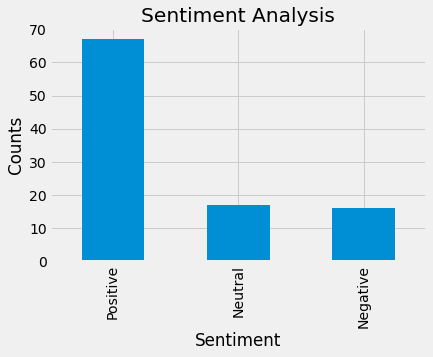

In [17]:
df['Analysis'].value_counts()
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()